# Weather Forecasting

### Problem Statement:
A company wants to develop a weather prediction model to accurately forecast weather conditions. The goal is to predict the type of weather (e.g., sunny, rainy, cloudy, etc.) based on historical weather data and relevant features. This model will help various sectors, including agriculture, transportation, and event planning, make informed decisions.

### Objective
The primary objective is to develop a machine learning model that can predict the weather type with high accuracy. The model should be able to handle different types of weather conditions and provide reliable predictions.

### Constraints
- Data Quality: Ensure the dataset used for training the model is comprehensive, clean, and representative of different weather conditions.
- Feature Selection: Identify and use relevant features (e.g., temperature, humidity, wind speed, pressure) that influence weather patterns.
- Model Complexity: The model should be complex enough to capture the patterns in the data but not so complex that it becomes computationally expensive or prone to overfitting.
- Real-time Predictions: The model should be able to provide predictions in real-time or near-real-time to be practically useful.

### Importing libraries

In [9]:
import pandas as pd

### Import dataset

In [10]:
df=pd.read_csv(r"C:\Users\Y SAI KUMAR\Downloads\archive (3)\weather_classification_data.csv")

In [11]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [13]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### Outlier Identification

<Axes: >

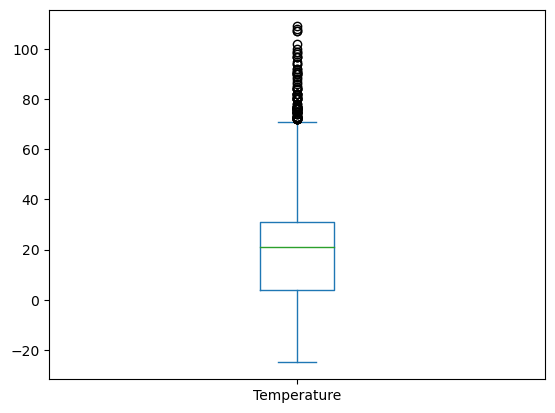

In [14]:
df['Temperature'].plot(kind="box")

<Axes: >

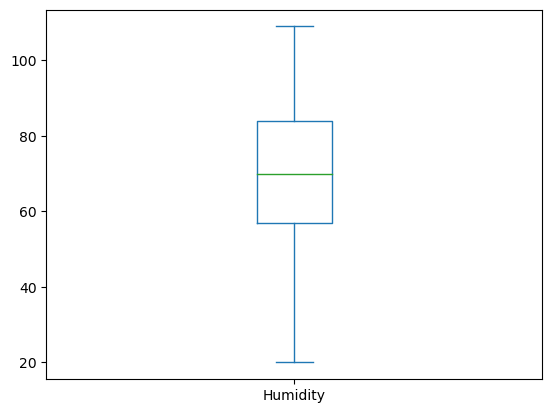

In [15]:
df['Humidity'].plot(kind="box")

<Axes: >

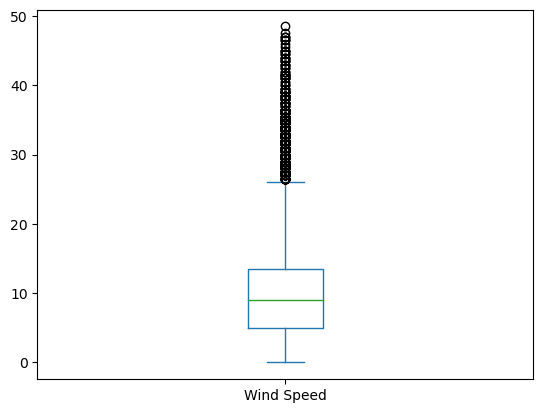

In [16]:
df['Wind Speed'].plot(kind="box")

<Axes: >

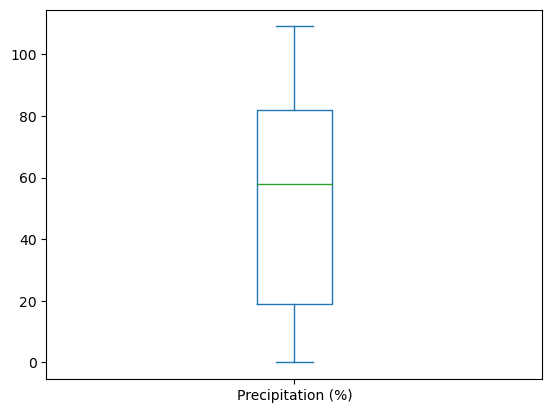

In [17]:
df['Precipitation (%)'].plot(kind="box")

<Axes: >

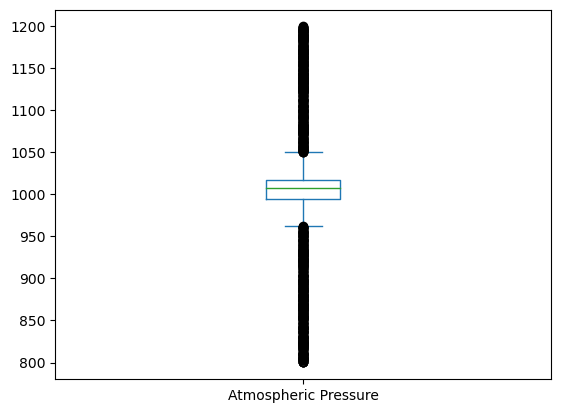

In [18]:
df['Atmospheric Pressure'].plot(kind="box")

<Axes: >

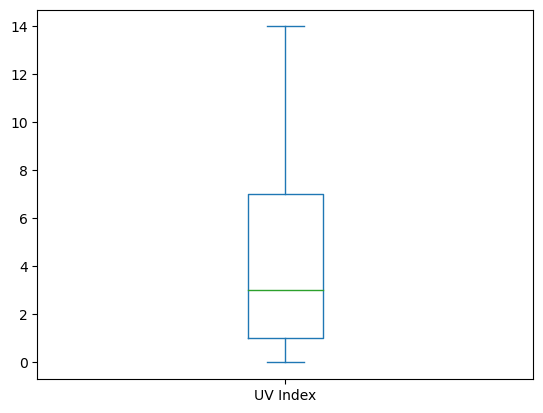

In [19]:
df['UV Index'].plot(kind="box")

<Axes: >

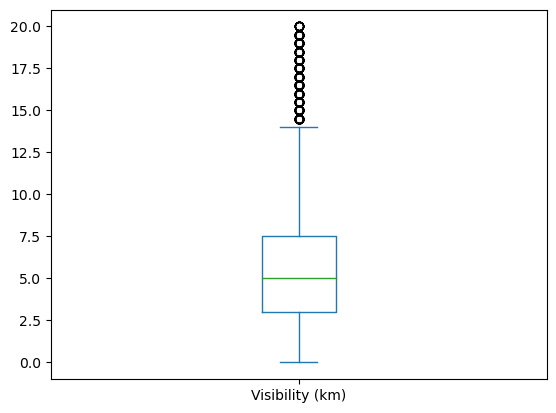

In [20]:
df['Visibility (km)'].plot(kind='box')

### Outlier Treatment

In [21]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
win.fit_transform(df[['Temperature']])

,Temperature
0,14.00
1,32.35
2,30.00
3,32.35
4,27.00
...,...
13195,10.00
13196,2.65
13197,30.00
13198,3.00


In [22]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
win.fit_transform(df[['Wind Speed']])

,Wind Speed
0,9.500
1,8.500
2,7.000
3,4.575
4,13.925
...,...
13195,13.925
13196,4.575
13197,5.500
13198,10.000


In [23]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
win.fit_transform(df[['Atmospheric Pressure']])

,Atmospheric Pressure
0,1010.820000
1,1011.430000
2,1017.871125
3,1017.871125
4,993.701375
...,...
13195,1003.150000
13196,1017.871125
13197,1012.690000
13198,993.701375


In [24]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
win.fit_transform(df[['Visibility (km)']])

,Visibility (km)
0,3.500
1,7.725
2,5.500
3,2.775
4,2.775
...,...
13195,2.775
13196,6.000
13197,7.725
13198,2.775


### Complete Exploratory data analysis

In [25]:
import sweetviz

In [26]:
report=sweetviz.analyze(df)

In [27]:
report.show_html('Weather eda report.html')

### Feature Identification

In [28]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Feature engineering

In [29]:
num = ['Temperature','Humidity','Wind Speed','Precipitation (%)','UV Index','Atmospheric Pressure','Visibility (km)']
nomin = ['Location','Season']
ordin = ['Cloud Cover']

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

### Pipeline creation for feature preprocessing

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
Numerical= Pipeline([('Mean Imputation',SimpleImputer()),
         ('Scaling',StandardScaler())])

Nominal=Pipeline([('Mode Imputataion',SimpleImputer(strategy='most_frequent')),
                 ('encoding',OneHotEncoder(drop='first'))])

Ordinal = Pipeline([('Mode Imputation',SimpleImputer(strategy='most_frequent')),
                   ('encoding',OrdinalEncoder())])

In [33]:
Numerical

Pipeline(steps=[('Mean Imputation', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [34]:
Nominal

Pipeline(steps=[('Mode Imputataion', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder(drop='first'))])

In [35]:
Ordinal

Pipeline(steps=[('Mode Imputation', SimpleImputer(strategy='most_frequent')),
                ('encoding', OrdinalEncoder())])

### Column Transformation

In [36]:
from sklearn.compose import ColumnTransformer

In [37]:
Preprocessing = ColumnTransformer([("Numerical",Numerical,num),
                   ("Nominal",Nominal,nomin),
                   ("Ordinal",Ordinal,ordin)])

In [38]:
Preprocessing

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'UV Index',
                                  'Atmospheric Pressure', 'Visibility (km)']),
                                ('Nominal',
                                 Pipeline(steps=[('Mode Imputataion',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Location', 'Season']),
                                ('Ordinal',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder())]),
                                 ['Cloud Cover'])])

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model=Pipeline([('Preprocessing',Preprocessing),
         ('Model',DecisionTreeClassifier())])

In [41]:
model

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation (%)',
                                                   'UV Index',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('Nominal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputataion',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Location', 'Season']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['Cloud Cover'])])),
                ('Model', DecisionTreeClassifier())])

### Split data into separate training and test set

In [43]:
x = df.drop('Weather Type',axis=1)
y = df['Weather Type']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Model training


In [71]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

### Predict results

In [72]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8962121212121212

### Using LogisticRegression Algorithm

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model=Pipeline([('Preprocessing',Preprocessing),
         ('Model',DecisionTreeClassifier())])
x = df.drop('Weather Type',axis=1)
y = df['Weather Type']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8981060606060606

### Pickling

In [73]:
import pickle

In [74]:
pickle.dump(model,open("weather.pkl","wb"))

In [75]:
Model= pickle.load(open("weather.pkl","rb"))